In [75]:
import pandas as pd

In [76]:
excel_files: list[str] = [
    "2009_procurement_programs.xls",
    "2010_procurement_programs.xls",
    "2011_procurement_programs.xls",
    "2012_procurement_programs.xlsx",
    "2013_procurement_programs.xlsx",
    "2014_procurement_programs.xlsx",
    "2015_procurement_programs.xlsx",
    "2016_procurement_programs.xlsx",
    "2017_procurement_programs.xlsx",
    "2018_procurement_programs.xlsx",
    "2019_procurement_programs.xlsx",
    "2020_procurement_programs.xlsx",
    "2021_procurement_programs.xlsx",
    "2022_procurement_programs.xlsx",
    "2023_procurement_programs.xlsx",
    "2024_procurement_programs.xlsx",
    "2025_procurement_programs.xlsx"
]

In [77]:
def create_dataframes(excel_files: list[str]) -> dict[int, pd.DataFrame]:
    dataframes = {}

    for file in excel_files:
        year_prefix = int(file.split("_")[0])

        if year_prefix < 2013:
            df = pd.read_excel(f'data/{file}', sheet_name=0, header=0)
        elif year_prefix >= 2013:
            df = pd.read_excel(f'data/{file}', sheet_name=0, header=1)

        dataframes[year_prefix] = df

    return dataframes

dataframes = create_dataframes(excel_files)

In [78]:
def clean_headers(dataframes: dict[int, pd.DataFrame]) -> dict[int, pd.DataFrame]:
    cleaned = {}
    for year, df in dataframes.items():
        clean_column_names = (
            df.columns
              .str.replace("\n", " ", regex=False)  # remove newlines
              .str.strip()                          # trim whitespace
              .str.replace(r"\s+", " ", regex=True) # collapse double spaces
        )
        df = df.copy()
        df.columns = clean_column_names
        cleaned[year] = df

    return cleaned

# usage
dataframes = clean_headers(dataframes)


In [79]:
def take_relevant_rows(dataframes: dict[int, pd.DataFrame]) -> dict[int, pd.DataFrame]:
    f35_procurement_rows = {}

    # Excel files switched from using 'Line Item Title' to 'Program Element/Budget Line Item (BLI) Title' in 2024
    for year, df in dataframes.items():
        if 'Line Item Title' in df.columns:
            bli_column_heading: str = 'Line Item Title'
        elif 'Program Element/Budget Line Item (BLI) Title' in df.columns:
            bli_column_heading: str = 'Program Element/Budget Line Item (BLI) Title'
        else:
            continue

        f35_row = df.loc[
            (df[bli_column_heading].str.lower() == "AH-64 Apache Block IIIA Reman".lower()) &
            (df["Cost Type Title"].str.lower() == "weapon system cost".lower())
        ]

        f35_procurement_rows[year] = f35_row
        display(f35_procurement_rows[year])
    

    return f35_procurement_rows

f35_procurement_rows = take_relevant_rows(dataframes)

,Account,Treasury Agency,Account Title,Organization,Organization Title,Line Number,Budget Activity,Budget Activity Title,BSA,BSA Title,...,Cost Type,Cost Type Title,Advance Use Year,Service Usage Approval,2007 Quantity,2007 Amount,2008 Quantity,2008 Amount,2009 Quantity,2009 Amount


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,BSA Title,Line Item,Line Item Title,...,FY 2008 Base&OCO Actuals Amount,FY 2009 Base&OCO SupReq 4/9/09 Quantity,FY 2009 Base&OCO SupReq 4/9/09 Amount,FY 2010 Base Quantity,FY 2010 Base Amount,FY 2010 OCO Quantity,FY 2010 OCO Amount,FY 2010 Total Quantity,FY 2010 Total Amount,Classification


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,BSA Title,Line Item,Line Item Title,...,FY 2010 Supplemental Request Amount,FY 2010 Total Quantity,FY 2010 Total Amount,FY 2011 Base Quantity,FY 2011 Base Amount,FY 2011 OCO Quantity,FY 2011 OCO Amount,FY 2011 Total Request Quantity,FY 2011 Total Request Amount,Classification


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,BSA Title,Line Item,Line Item Title,...,FY 2011 Annualized CR OCO** Amount,FY 2011 Annualized CR Total** Quantity,FY 2011 Annualized CR Total** Amount,FY 2012 Base Quantity,FY 2012 Base Amount,FY 2012 OCO Quantity,FY 2012 OCO Amount,FY 2012 Total Quantity,FY 2012 Total Amount,Classification
8,2031A,"Aircraft Procurement, Army",ARMY,1.0,Aircraft,9.0,20.0,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,...,0.0,0.0,316312.0,19.0,572155.0,0.0,0.0,19.0,572155.0,U


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,BSA Title,Line Item,Line Item Title,...,FY 2012 OCO Amount,FY 2012 Total Quantity,FY 2012 Total Amount,FY 2013 Base Quantity,FY 2013 Base Amount,FY 2013 OCO Quantity,FY 2013 OCO Amount,FY 2013 Total Quantity,FY 2013 Total Amount,Classification
6,2031A,"Aircraft Procurement, Army",ARMY,1,Aircraft,7.0,20,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,...,0,19,528742,40,769879,0,0,40,769879,U


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,BSA Title,Line Item,Line Item Title,...,FY 2013 OCO Request with CR Adj* Amount,FY 2013 Total Request with CR Adj* Quantity,FY 2013 Total Request with CR Adj* Amount,FY 2014 Base Quantity,FY 2014 Base Amount,FY 2014 OCO Quantity,FY 2014 OCO Amount,FY 2014 Total Quantity,FY 2014 Total Amount,Classification
6,2031A,"Aircraft Procurement, Army",ARMY,1.0,Aircraft,7.0,20.0,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,...,0.0,40.0,769879.0,42.0,716176.0,0.0,0.0,42.0,716176.0,U


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,BSA Title,Line Item,Line Item Title,...,FY 2014 OCO Enacted Amount,FY 2014 Total Enacted Quantity,FY 2014 Total Enacted Amount *,FY 2015 Base Quantity,FY 2015 Base Amount,FY 2015 OCO Quantity,FY 2015 OCO Amount,FY 2015 Total Quantity,FY 2015 Total Amount,Classification
6,2031A,"Aircraft Procurement, Army",ARMY,1.0,Aircraft,7.0,20.0,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,...,0.0,42.0,722311.0,25.0,494009.0,0.0,0.0,25.0,494009.0,U


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,BSA Title,Line Item,Line Item Title,...,FY 2015 OCO Enacted Amount *,FY 2015 Total Enacted Quantity,FY 2015 Total Enacted Amount,FY 2016 Base Quantity,FY 2016 Base Amount,FY 2016 OCO Quantity,FY 2016 OCO Amount,FY 2016 Total Quantity,FY 2016 Total Amount,Classification
6,2031A,"Aircraft Procurement, Army",ARMY,1.0,Aircraft,7.0,20.0,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,...,144000.0,35.0,866940.0,64.0,1325799.0,0.0,0.0,64.0,1325799.0,U


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,Budget Sub Activity (BSA) Title,Line Item,Line Item Title,...,"FY 2017 Less Enacted Div.B,P.L. 114-254 OCO Amount",FY 2017 Remaining PB Request OCO Quantity,FY 2017 Remaining PB Request OCO Amount,FY 2017 PB Request wNov Amend Less Enacted PL 114-254 Base+OCO Quantity,FY 2017 PB Request wNov Amend Less Enacted PL 114-254 Base+OCO Amount,FY 2017 Mar Amended Request Base+OCO Quantity,FY 2017 Mar Amended Request Base+OCO Amount,FY 2017 PB Remaining Base+OCO Quantity,FY 2017 PB Remaining Base+OCO Amount,Classification
3,2031A,"Aircraft Procurement, Army",ARMY,1.0,Aircraft,4.0,20.0,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,...,0.0,4.0,78040.0,52.0,1091054.0,0.0,0.0,52.0,1091054.0,U


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,Budget Sub Activity (BSA) Title,Line Item,Line Item Title,...,FY 2018 Amendment Emergency Amount,FY 2018 OCO Request Quantity,FY 2018 OCO Request Amount,FY 2018 Amendment OCO Quantity,FY 2018 Amendment OCO Amount,FY 2018 Total OCO Quantity,FY 2018 Total OCO Amount,FY 2018 Grand Total Quantity,FY 2018 Grand Total Amount,Classification
5,2031A,"Aircraft Procurement, Army",ARMY,1,Aircraft,6.0,20,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,...,0,4,39040,0,0,4,39040,52,950176,U


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,Budget Sub Activity (BSA) Title,Line Item,Line Item Title,...,FY 2018 Less Enacted DIV B P.L.115-96*** MDDE + Ship Repairs Amount,FY 2018 Remaining Req with CR Adj Base + OCO + Emergency Quantity,FY 2018 Remaining Req with CR Adj Base + OCO + Emergency Amount,FY 2019 Base Quantity,FY 2019 Base Amount,FY 2019 OCO Quantity,FY 2019 OCO Amount,FY 2019 Total Quantity,FY 2019 Total Amount,Classification
6,2031A,"Aircraft Procurement, Army",ARMY,1.0,Aircraft,7.0,20.0,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,...,0.0,52.0,950176.0,48.0,924158.0,0.0,0.0,48.0,924158.0,U


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,Budget Sub Activity (BSA) Title,Line Item,Line Item Title,...,FY 2020 Base Amount,FY 2020 OCO for Base Requirements Quantity,FY 2020 OCO for Base Requirements Amount,FY 2020 OCO for Direct War and Enduring Costs Quantity,FY 2020 OCO for Direct War and Enduring Costs Amount,FY 2020 Total OCO Quantity,FY 2020 Total OCO Amount,FY 2020 Total (Base + OCO) Quantity,FY 2020 Total (Base + OCO) Amount,Classification
7,2031A,"Aircraft Procurement, Army",ARMY,1,Aircraft,8.0,20,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,...,981399,0,0,0,0,0,0,48,981399,U


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,Budget Sub Activity (BSA) Title,Line Item,Line Item Title,...,FY 2021 Base Amount,FY 2021 OCO for Base Requirements Quantity,FY 2021 OCO for Base Requirements Amount,FY 2021 OCO for Direct War and Enduring Costs Quantity,FY 2021 OCO for Direct War and Enduring Costs Amount,FY 2021 Total OCO Quantity,FY 2021 Total OCO Amount,FY 2021 Total (Base + OCO) Quantity,FY 2021 Total (Base + OCO) Amount,Classification
6,2031A,"Aircraft Procurement, Army",ARMY,1,Aircraft,7.0,20,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,...,982897,0,0,0,0,0,0,50,982897,U


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,Budget Sub Activity (BSA) Title,Line Item,Line Item Title,Cost Type,Cost Type Title,Add/ Non-Add,FY 2020 Actual* Quantity,FY 2020 Actual* Amount,FY 2021 Enacted** Quantity,FY 2021 Enacted** Amount,FY 2022 Request Quantity,FY 2022 Request Amount,Classification
6,2031A,"Aircraft Procurement, Army",ARMY,1.0,Aircraft,7.0,20.0,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,A,Weapon System Cost,Add,49.0,993780.0,50.0,982897.0,30.0,673596.0,U


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,Budget Sub Activity (BSA) Title,Line Item,Line Item Title,Cost Type,Cost Type Title,Add/ Non-Add,FY 2021 (Base + OCO) Quantity,FY 2021 (Base + OCO) Amount,FY 2022 Enactment Quantity,FY 2022 Enactment Amount*,FY 2023 Request Quantity,FY 2023 Request Amount,Classification
6,2031A,"Aircraft Procurement, Army",ARMY,1.0,Aircraft,7.0,20.0,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,A,Weapon System Cost,Add,50.0,982897.0,29.0,638596.0,35.0,716891.0,U


,Account,Account Title,Organization,Budget Activity,Budget Activity Title,Line Number,BSA,Budget SubActivity (BSA) Title,Budget Line Item,Program Element/Budget Line Item (BLI) Title,...,FY 2022 Actuals Amount,FY 2023 Less Supplementals Enacted Quantity,FY 2023 Less Supplementals Enacted Amount,FY 2023 Supplementals Enacted Quantity,FY 2023 Supplementals Enacted Amount*,FY 2023 Total Enacted Quantity,FY 2023 Total Enacted Amount,FY 2024 Request Quantity,FY 2024 Request Amount,Classification
5,2031A,"Aircraft Procurement, Army",A,1.0,Aircraft,6.0,20.0,Rotary,5757A05111,AH-64 Apache Block IIIA Reman,...,638596.0,33.0,716891.0,0.0,0.0,33.0,716891.0,42.0,887796.0,U


In [80]:
def take_actual_values(f35_procurement_rows: dict[int, pd.DataFrame]):
    years: list[int] = []
    quants: list[int] = []
    amounts: list[int] = []

    for year, df in f35_procurement_rows.items():
        if year == 2009:
            f35_quant = df['2009 Quantity'].iloc[0]
            f35_amount = df['2009 Amount'].iloc[0]
        elif year >= 2010 and year < 2017:
            f35_quant = df[f'FY {year} Base Quantity'].iloc[0]
            f35_amount = df[f'FY {year} Base Amount'].iloc[0]
        elif year == 2017:
            f35_quant = df[f'FY 2017 PB Request wNov Amend Less Enacted PL 114-254 Base+OCO Quantity'].iloc[0]
            f35_amount = df[f'FY 2017 PB Request wNov Amend Less Enacted PL 114-254 Base+OCO Amount'].iloc[0]
        elif year == 2018:
            f35_quant = df[f'FY 2018 Grand Total Quantity'].iloc[0]
            f35_amount = df[f'FY 2018 Grand Total Amount'].iloc[0]
        elif year == 2019:
            f35_quant = df[f'FY {year} Total Quantity'].iloc[0]
            f35_amount = df[f'FY {year} Total Amount'].iloc[0]
        elif year == 2020 or year == 2021:
            f35_quant = df[f'FY {year} Total (Base + OCO) Quantity'].iloc[0]
            f35_amount = df[f'FY {year} Total (Base + OCO) Amount'].iloc[0]
        elif year > 2021 and year <= 2025:
            f35_quant = df[f'FY {year} Request Quantity'].iloc[0]
            f35_amount = df[f'FY {year} Request Amount'].iloc[0]        

        years.append(year)
        quants.append(int(f35_quant))
        amounts.append(int(f35_amount))

    return years, quants, amounts

years, quants, amounts = take_actual_values(f35_procurement_rows)

IndexError: single positional indexer is out-of-bounds

In [ ]:
def create_annual_tuples(years: list[int], quants: list[int], amounts: list[int]) -> list[tuple[int, int, int]]:
    records: list[tuple[int, int, int]] = [record for record in zip(years, quants, amounts)]

    return records

records = create_annual_tuples(years, quants, amounts)

In [ ]:
def cost_per_f35(records: list[tuple[int, int, int]]):
    for year, quant, amount in records:
        print(amount)
        print(quant)
        item_cost: int = round(((amount / quant) * 1000))

records = cost_per_f35(records)

1796491
8
2220267
10
4007842
22
3597615
19
3353279
19
3354170
19
3892579
26
5552092
44
4862154
43
4949184
46
4869121
48
4852559
48
5293518
48
4714804
48
3811893
33
5113823
48


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


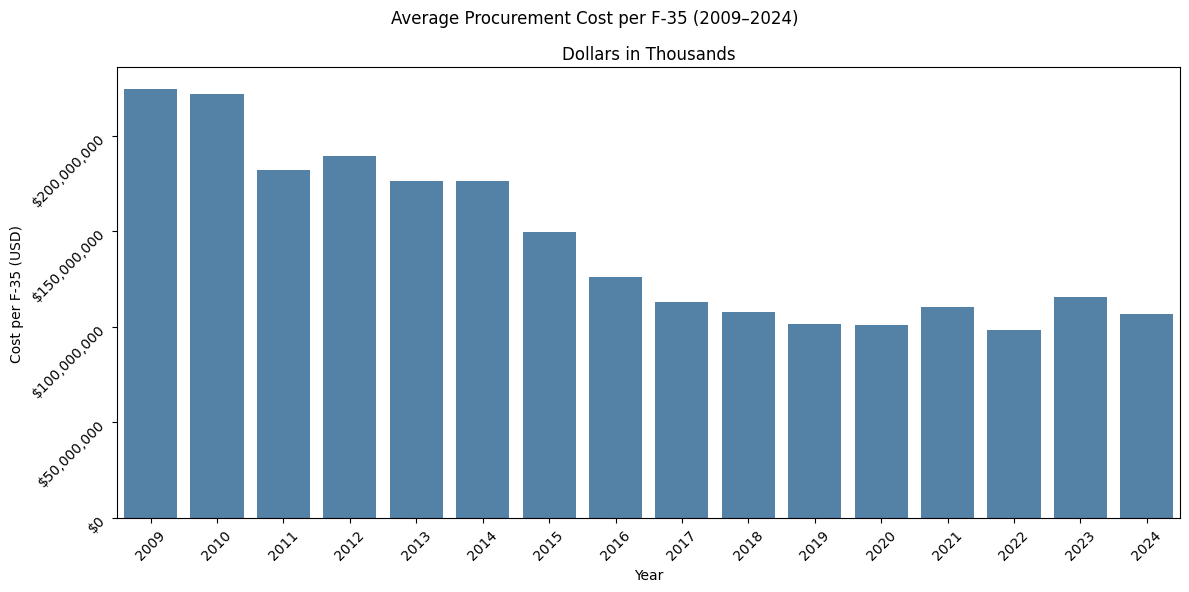

In [ ]:
def basic_per_f35_barplot(records: list[tuple[int, int, int]]):
    df = pd.DataFrame({
        "Year": list(range(2009,2025)),
        "Quantity": quants,
        "Amount": amounts,
        "UnitCost": [((amount / quant) * 1000) for amount, quant in zip(amounts, quants)]
    })
    plt.figure(figsize=(12,6))
    sns.barplot(data=df, x="Year", y="UnitCost", color="steelblue")

    plt.suptitle("Average Procurement Cost per F-35 (2009–2024)")
    plt.title("Dollars in Thousands")

    plt.ylabel("Cost per F-35 (USD)")
    plt.xlabel("Year")
    plt.yticks(rotation=45)
    plt.xticks(rotation=45)

    # Format y-axis as dollars
    import matplotlib.ticker as ticker
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

    plt.tight_layout()
    plt.show()

basic_per_f35_barplot(records)
